**K-means**

Es un algoritmo de clustering muy popular en el aprendizaje no supervisado. Su objetivo principal es agrupar un conjunto de datos en k grupos (o clusters) de manera que los elementos dentro de un mismo cluster sean lo más similares posible, y los elementos de diferentes clusters sean lo más diferentes posible.  

Pasos básicos del algoritmo:  

**Inicialización:**

Se elige un número k que representa el número de clusters deseado.
Se seleccionan aleatoriamente k puntos del conjunto de datos como centroides iniciales de cada cluster.

**Asignación:**

Cada punto de datos se asigna al centroide más cercano. Es decir, se calcula la distancia entre cada punto y todos los centroides, y el punto se asigna al cluster cuyo centroide tenga la menor distancia.
Actualización de centroides:    

Se recalculan las posiciones de los centroides como la media de todos los puntos asignados a cada cluster.  

**Repetición:**

Se repiten los pasos 2 y 3 hasta que los centroides ya no se muevan significativamente o se alcance un número máximo de iteraciones.  

In [ ]:
import pandas as pd
datos = pd.read_csv('uac_limpio.csv' , sep=';')

In [ ]:
datos.head()

,ESCUELA,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPACumulado,PPAnterior
0,ADMINISTRACIÓN,20,1,0,0,0,0,2,4,14.128,14.389
1,ADMINISTRACIÓN,27,0,0,0,1,0,2,5,12.796,12.632
2,ADMINISTRACIÓN,22,0,0,0,1,1,1,10,14.906,15.381
3,ADMINISTRACIÓN,27,1,2,1,1,1,2,7,15.309,15.762
4,ADMINISTRACIÓN,31,0,0,0,1,1,2,10,14.581,13.000


:Crea el gráfico de dispersión.

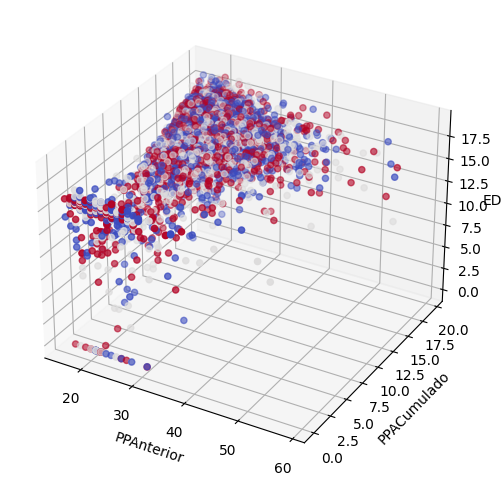

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Asegúrate de que los nombres de las columnas coincidan con las de tu DataFrame
ax.scatter(datos['EDAD'], datos['PPAnterior'], datos['PPACumulado'],
           c=datos['NIVEL_SOCIO_ECON'], cmap="coolwarm")

# Etiquetas de los ejes
ax.set_xlabel('PPAnterior')
ax.set_ylabel('PPACumulado')
ax.set_zlabel('EDAD')

plt.show()


<Axes: xlabel='PPAnterior', ylabel='PPACumulado'>

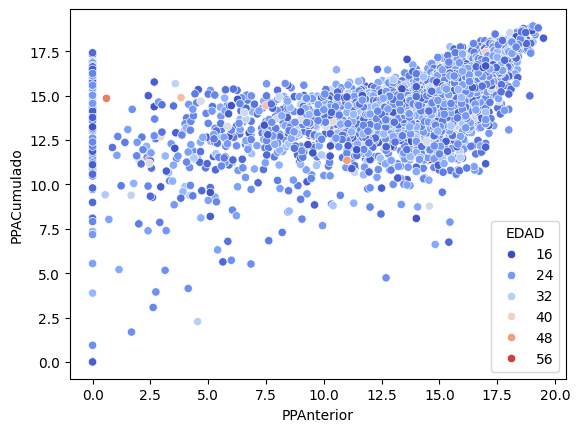

In [ ]:
import seaborn as sb
sb.scatterplot(x="PPAnterior", y="PPACumulado", data=datos, hue="EDAD",
               palette="coolwarm")

<Axes: xlabel='PPAnterior', ylabel='PPACumulado'>

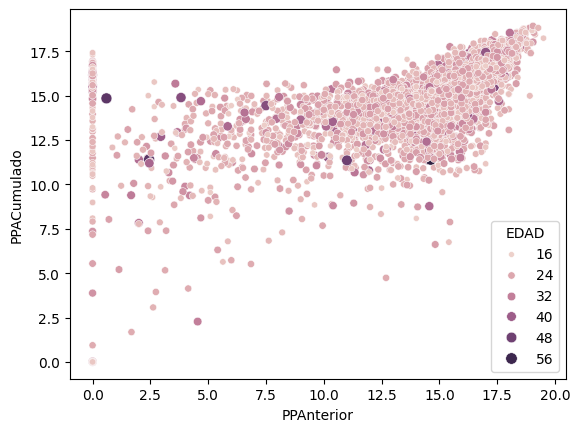

In [ ]:
import seaborn as sb
sb.scatterplot(x="PPAnterior", y="PPACumulado", data=datos, hue="EDAD", size="EDAD")

In [ ]:
datos.loc[:, ['PPAnterior','PPACumulado','EDAD']]

,PPAnterior,PPACumulado,EDAD
0,14.389,14.128,20
1,12.632,12.796,27
2,15.381,14.906,22
3,15.762,15.309,27
4,13.000,14.581,31
...,...,...,...
7518,16.000,16.376,26
7519,14.933,14.730,24
7520,13.316,14.949,22
7521,15.000,11.716,22


In [ ]:
from sklearn.cluster import KMeans

X = datos.loc[:, ['EDAD','SEXO', 'EST_CIVIL', 'HIJOS', 'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'NIVEL_SOCIO_ECON', 'SEMESTRE', 'PPAnterior','PPACumulado']]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

In [ ]:
predicciones.shape

(7523,)

In [ ]:
X["PROMEDIOFINAL"] = predicciones

In [ ]:
X

,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPAnterior,PPACumulado,PROMEDIOFINAL
0,20,1,0,0,0,0,2,4,14.389,14.128,1
1,27,0,0,0,1,0,2,5,12.632,12.796,4
2,22,0,0,0,1,1,1,10,15.381,14.906,5
3,27,1,2,1,1,1,2,7,15.762,15.309,4
4,31,0,0,0,1,1,2,10,13.000,14.581,4
...,...,...,...,...,...,...,...,...,...,...,...
7518,26,0,2,1,1,1,0,4,16.000,16.376,4
7519,24,1,2,1,0,0,2,12,14.933,14.730,5
7520,22,1,0,0,1,0,0,9,13.316,14.949,5
7521,22,1,0,0,1,1,0,10,15.000,11.716,5


In [ ]:
X["PROMEDIOFINAL"].value_counts()

,count
PROMEDIOFINAL,
5,2673
1,2124
4,1308
3,661
2,389
0,368


<Axes: xlabel='PPAnterior', ylabel='PPACumulado'>

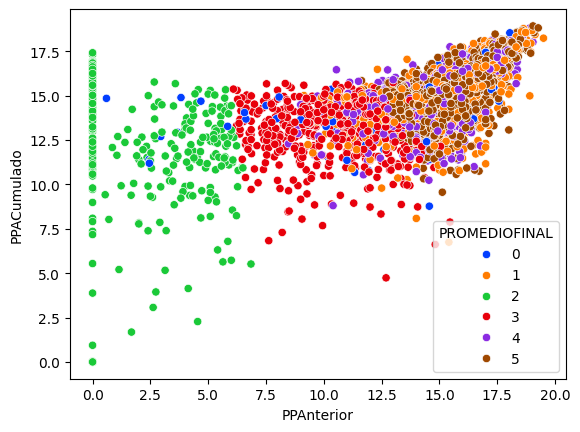

In [ ]:
import seaborn as sb
sb.scatterplot(x="PPAnterior", y="PPACumulado", data=X, hue="PROMEDIOFINAL",
               palette="bright")

<Axes: xlabel='PROMEDIOFINAL', ylabel='count'>

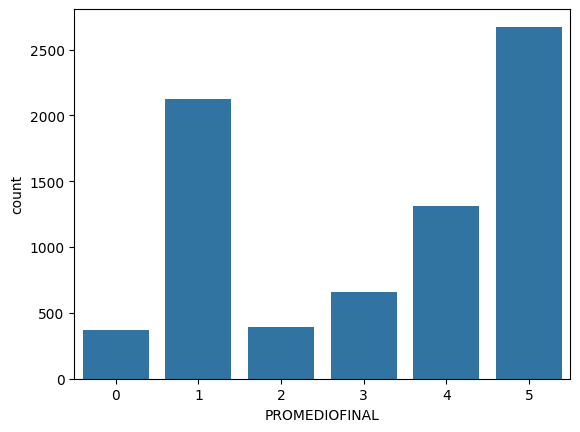

In [ ]:
sb.countplot(x="PROMEDIOFINAL", data=X)

In [ ]:
X.groupby(["PROMEDIOFINAL"])["PPACumulado"].mean()

,PPACumulado
PROMEDIOFINAL,
0,15.284951
1,15.412045
2,11.903794
3,13.273762
4,15.262277
5,15.515603
